** Data mining A **

**Username** : onde2anget

1. Soni Adiyatma* 06211440000050*
2. Rizky nanda noverianto* 06211440000062*                    
3. Achmad Wildan Al Aziz* 06211440000082*

# Load Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Load Dataset

In [116]:
df=pd.read_csv('train.csv', index_col='Loan_ID')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


terdapat 12 kolom dan 614 data. Hanya variabel ApplicantIncome, CoapplicantIncome, Education, Propoerty Area, dan Loan_Status yang tidak memiliki missing value.

# Missing Value Imputation

In [118]:
pd.crosstab(df['Married'], (df['CoapplicantIncome']==0))

CoapplicantIncome,False,True
Married,,
No,70,143
Yes,270,128


Imputasi variabel married berdasarkan coappilant income. diasumsikan hubungan Applicant dan Coapplicant adalah suami istri. Dari crosstable diatas dapat disimpulkan applicant yang belum menikah cenderung tidak memiliki coapplicant income dan sebaliknya. 

In [119]:
df.loc[(df['Married'].isnull()) & (df['CoapplicantIncome']==0), 'Married'] = 'No'
df.loc[(df['Married'].isnull()), 'Married'] = 'Yes'

In [120]:
pd.crosstab(df['Gender'], (df['Married']=='Yes') & (df['ApplicantIncome']>df['CoapplicantIncome']))

col_0,False,True
Gender,,
Female,86,26
Male,180,309


Diasumsikan jika applicant telah menikah dan pendapatannya lebih besar dari coapplicant maka gendernya adala pria. seperti pada crosstable diatas.

In [121]:
a=((df['Gender'].isnull()) & (df['Married']=='Yes') & (df['ApplicantIncome']>df['CoapplicantIncome']))
df.loc[a, 'Gender'] = 'Male'
df.loc[df['Gender'].isnull(),'Gender'] = 'Female'

Variabel lainnya dapat diimputasi dengan modus untuk variabel kualitatif dan mean untuk variabel kuantitatif

In [122]:
mmodus = ['Gender','Married','Self_Employed','Dependents','Credit_History']
mmean = ['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']

In [123]:
for feature in mmean:
        if feature in df.columns.values:
            df[feature] = df[feature].fillna(df[feature].mean())
            
for feature in mmodus:
        if feature in df.columns.values:
            df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

# Encoding Categorical Features

In [124]:
kategori = ['Gender','Married','Education','Self_Employed','Dependents','Credit_History', 'Property_Area','Loan_Status']
for feature in kategori:
        if feature in df.columns.values:
            df[feature] = LabelEncoder().fit_transform(df[feature])

In [125]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


# Data Exploration

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null int64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(3), int64(9)
memory usage: 62.4+ KB


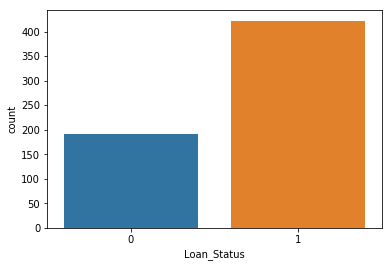

In [127]:
sns.countplot(x=df.Loan_Status)
plt.show()

Dari diagram batang diatas diketahui kelas data tidak seimbang

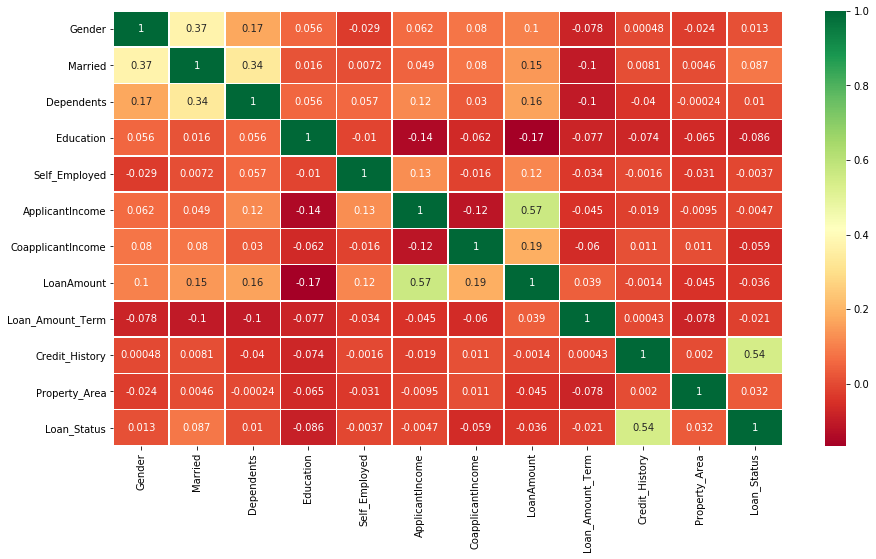

In [128]:
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Hanya variabel Credit_history yang memiliki korelasi cukup besar terhadap Loan_Status

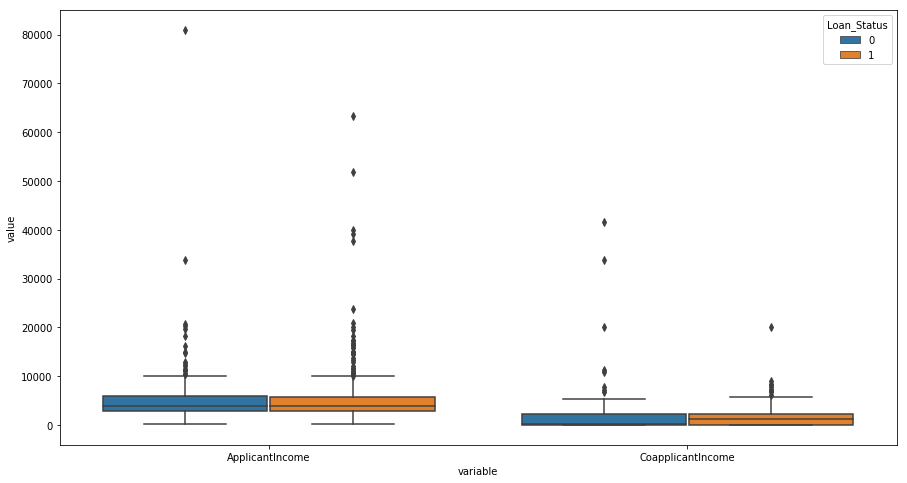

In [129]:
dff=pd.melt(df[['ApplicantIncome','CoapplicantIncome','Loan_Status']],id_vars='Loan_Status')
sns.boxplot(y="value", x="variable", hue='Loan_Status', data=dff)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Tampak variabel Applicant Income dan Coapplicant Income tidak memiliki perbedaan karakteristik terhadap Loan Status

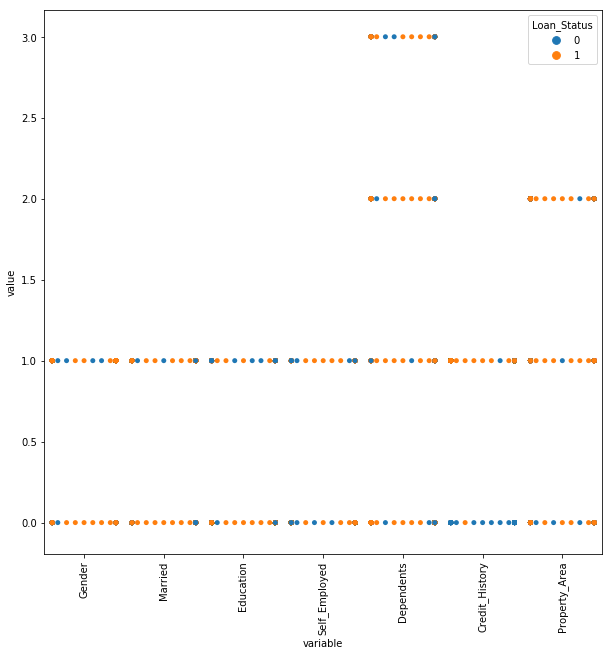

In [130]:
dff2=pd.melt(df[['Gender','Married','Education','Self_Employed','Dependents','Credit_History', 'Property_Area','Loan_Status']],id_vars='Loan_Status')
sns.swarmplot(x="variable", y="value", hue="Loan_Status", data=dff2)
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Hanya variabel Credit_History yang memiliki perbedaan karakteristik terhadap Loan Status.

# Feature Engineering

In [131]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['Loan/Income']=df['LoanAmount']/df['TotalIncome']
df['Loan/Term']=df['LoanAmount']/df['Loan_Amount_Term']
df['RepaymentRatio']=(df['Loan/Term']*1000)/df['TotalIncome']

In [132]:
transformation=StandardScaler().fit(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']]=transformation.transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])

In [133]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio
Loan_ID,,,,,,,,,,,,,,,,
LP001002,1,0,0,0,0,0.072991,-0.554487,0.000000,0.279851,1,2,1,-0.182184,0.025032,0.406700,0.069533
LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.279851,1,0,0,-0.144684,0.021015,0.355556,0.058374
LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.279851,1,2,1,-0.623656,0.022000,0.183333,0.061111
LP001006,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.279851,1,2,1,-0.322885,0.024287,0.333333,0.067463
LP001008,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.279851,1,2,1,-0.158785,0.023500,0.391667,0.065278


In [134]:
x=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

# Classification Algorithm

In [135]:
cv=StratifiedKFold(n_splits=5,random_state=5)

In [136]:
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier ( max_iter=1000)))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x, y,cv=cv)
    results.append(akurasi)
    names.append(name)
    hasil = "%s: %f" % (name, akurasi.mean())
    tabel.append(hasil)
tabel

['CART: 0.708778',
 'KNN: 0.744474',
 'Naive Bayes: 0.794897',
 'SVM: 0.801401',
 'Random Forest: 0.767187',
 'Bagging: 0.778583',
 'AdaBoost: 0.793178',
 'Gradient Boosting: 0.788498',
 'Logistic Regression: 0.804680',
 'MLP: 0.778556']

## Prediction

In [137]:
df_test=pd.read_csv('test.csv',index_col='Loan_ID')
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [138]:
#Imputasi missing value
df_test.loc[(df_test['Married'].isnull()) & (df_test['CoapplicantIncome']==0), 'Married'] = 'No'
df_test.loc[(df_test['Married'].isnull()), 'Married'] = 'Yes'

a=((df_test['Gender'].isnull()) & (df_test['Married']=='Yes') & (df_test['ApplicantIncome']>df_test['CoapplicantIncome']))
df_test.loc[a, 'Gender'] = 'Male'
df_test.loc[df_test['Gender'].isnull(),'Gender'] = 'Female'

mmodus = ['Gender','Married','Self_Employed','Dependents','Credit_History']
mmedian = ['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']

for feature in mmedian:
        if feature in df_test.columns.values:
            df_test[feature] = df_test[feature].fillna(df_test[feature].mean())
            
for feature in mmodus:
        if feature in df_test.columns.values:
            df_test[feature] = df_test[feature].fillna(df_test[feature].value_counts().index[0])
#Variabel Kategori
kategori = ['Gender','Married','Education','Self_Employed','Dependents','Credit_History', 'Property_Area','Loan_Status']

for feature in kategori:
        if feature in df_test.columns.values:
            df_test[feature] = LabelEncoder().fit_transform(df_test[feature])

#Feature Engineering
df_test['TotalIncome']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']
df_test['Loan/Income']=df_test['LoanAmount']/df_test['TotalIncome']
df_test['Loan/Term']=df_test['LoanAmount']/df_test['Loan_Amount_Term']
df_test['RepaymentRatio']=(df_test['Loan/Term']*1000)/df_test['TotalIncome']

#transformasi
transformation=StandardScaler().fit(df_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])
df_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']]=transformation.transform(df_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])

In [139]:
model=LogisticRegression(class_weight='balanced')
cross_val_score(model, x, y,cv=cv).mean()

0.77527763088313073

In [140]:
model.fit(x,y)
y_predict=model.predict(df_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1,

In [141]:
y_predict=pd.DataFrame(y_predict,columns =['Loan_Status'],index=df_test.index)
y_predict['Loan_Status']= y_predict['Loan_Status'].map({1: 'Y', 0: 'N'})
y_predict.to_csv("Submission.csv")
y_predict.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
